In [265]:
from enum import Enum
from math import sin, cos
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn 

In [266]:
class Function:

    def __init__(self):

        self.left = -1.8
        self.right = 0.2

    def __call__(self, x):
        return x ** 2 - 10 * (sin(x) ** 15)
    
    def derivative(self, x):
        return 2 * x - 150 * cos(x) * (sin(x) ** 14)

In [267]:
f = Function()

In [268]:
def plot_function(func, range_a, range_b, title, color):
    
    func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = list(map(func, func_x))

    plt.plot(func_x, func_y, label = title, color = color)

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Wykres zadanej funkcji f

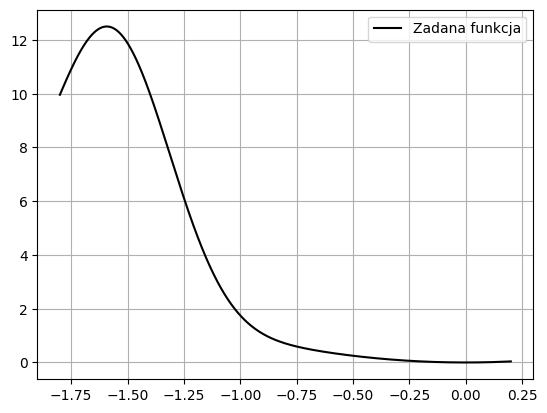

In [269]:
plot_function(f, f.left, f.right, "Zadana funkcja", "black") # Może wyprowadzić poza przedział

Wykres pochodnej zadanej funkcji f

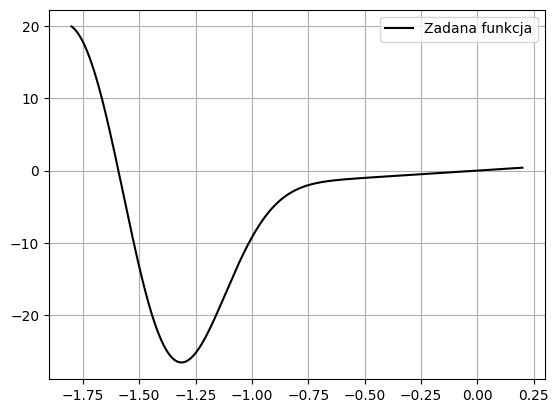

In [270]:
plot_function(f.derivative, f.left, f.right, "Zadana funkcja", "black") # Może wyprowadzić poza przedział

Znajdowanie miejsc zerowych funkcji nieliniowych metodą siecznych

![title](img_vsc/img01.png)

In [271]:
# Kryteria przyrostowe
# Stopping conditions for secant_method
class ConditionSecant(Enum):
    ABS = lambda y_i, eps : abs(y_i) < eps
    DISTANCE = lambda x_1, x_2, eps: abs(x_1 - x_2) < eps

In [272]:
def secant_method(f, x_0, x_1, condition, eps, max_iterations):
    
    x_i = x_0
    x_j = x_1 # x_j = x_(i + 1)
    
    for _ in range(max_iterations):
        
        if f(x_i) == f(x_j): # Division by zero, thus no solution
            return None
        
        x_i, x_j = x_j, x_j - ( (x_j - x_i) / (f(x_j) - f(x_i)) ) * f(x_j)
        
        if condition == ConditionSecant.ABS and ConditionSecant.ABS(f(x_j), eps):
            return x_j
        elif condition == ConditionSecant.DISTANCE and ConditionSecant.DISTANCE(x_i, x_j, eps):
            return x_j
    
    print("Exceeded max number of iterations")
    return None # Exceeded number of iterations

Przykładowe użycie

In [273]:
print(secant_method(f = f, x_0 = -0.5, x_1 = f.right, condition = ConditionSecant.ABS, eps = 1e-18, max_iterations = 1000))

9.915028892089407e-10


Znajdowanie miejsc zerowych funkcji nieliniowych metodą Newtona-Raphsona

![title](img_vsc/img02.png)

In [274]:
# Stopping conditions for newton_raphson_method
class ConditionNewton(Enum):
    ABS = lambda y_i, eps : abs(y_i) < eps
    DISTANCE = lambda y_i, yd_i, eps: abs(y_i / yd_i) < eps

In [275]:
def newton_raphson_method(f, x_0, condition, eps, max_iterations):
    
    x_i = x_0
    
    for iteration in range(max_iterations):
        
        y_i = f(x_i)
        yd_i = f.derivative(x_i)
        
        if yd_i == 0: # Derivative equal to zero
            return float("inf"), -1
        
        if condition == ConditionNewton.ABS and ConditionNewton.ABS(f(y_i), eps):
            return x_i, iteration
        elif condition == ConditionNewton.DISTANCE and ConditionNewton.DISTANCE(y_i, yd_i, eps):
            return x_i, iteration
        
        x_i  -= y_i / yd_i        
        
    return float("inf"), -1 # Max iterations exceeded

Przykładowe użycie

In [276]:
print(newton_raphson_method(f = f, x_0 = 0.01, condition = ConditionNewton.DISTANCE, eps = 1e-18, max_iterations = 1000))

(1.1102230246251566e-18, 53)


Miejsce zerowe wyznaczone przez wolfram alpha: x_0 = 0.0

In [277]:
class TestNewtonMethod():

    def __init__(self, f, max_iterations = 1000):

        self.f = f
        self.max_iterations = max_iterations

        self.eps_values_1 = [10 ** i for i in range(-1, -10 - 1, -1)]
        self.eps_values_2 = [10 ** i for i in range(-11, -20 - 1, -1)]
        self.x_values = [round(f.left + 0.1 * i, 1) for i in range(0, int(abs(f.left - f.right) / 0.1) + 1)]
                        
    def plot_heatmap_values(self, eps_values, condition):
        
        mini = float("inf")
        mini_data = (-1, -1, -1)

        data = np.zeros((len(eps_values), len(self.x_values)))

        for i, x in enumerate(self.x_values):
            for j, eps in enumerate(eps_values):
                
                x_0, _ = newton_raphson_method(self.f, x, condition, eps, self.max_iterations)
                #print('{:.1e}'.format(x_0), x, '{:.2e}'.format(eps))
        
                if abs(x_0) < abs(mini):
                    mini = x_0
                    mini_data = (x, eps, condition)

                data[j][i] = x_0

        plt.figure(figsize=(20, 8))

        print("Min value: ", '{:.1e}'.format(mini), ", Starting x: ", mini_data[0], ", Eps: ", eps, ", Contidion: ", condition)
            
        
        hm = sn.heatmap(data, annot=True, xticklabels=self.x_values, yticklabels=['{:.2e}'.format(label) for label in eps_values], cmap='crest', fmt='.1e', annot_kws={"size": 8})

        plt.xlabel('Wartości x')
        plt.ylabel('Wartości rho')
        plt.show()

    def plot_heatmap_iterations(self, eps_values, condition):
        
        iterations_data = np.zeros((len(eps_values), len(self.x_values)), dtype=int)

        for i, x in enumerate(self.x_values):
            for j, eps in enumerate(eps_values):
                _, iterations = newton_raphson_method(self.f, x, condition, eps, self.max_iterations)
                iterations_data[j][i] = iterations

        plt.figure(figsize=(20, 8))

        hm = sn.heatmap(iterations_data, annot=True, xticklabels=self.x_values, yticklabels=['{:.2e}'.format(label) for label in eps_values], cmap='crest', fmt='d', annot_kws={"size": 8})

        plt.xlabel('Wartości x')
        plt.ylabel('Wartości rho')
        plt.show()



In [278]:
test_newton = TestNewtonMethod(f)

ABS condition

Min value:  -1.8e-03 , Starting x:  -1.8 , Eps:  1e-10 , Contidion:  <function ConditionNewton.<lambda> at 0x7fde5b801a20>


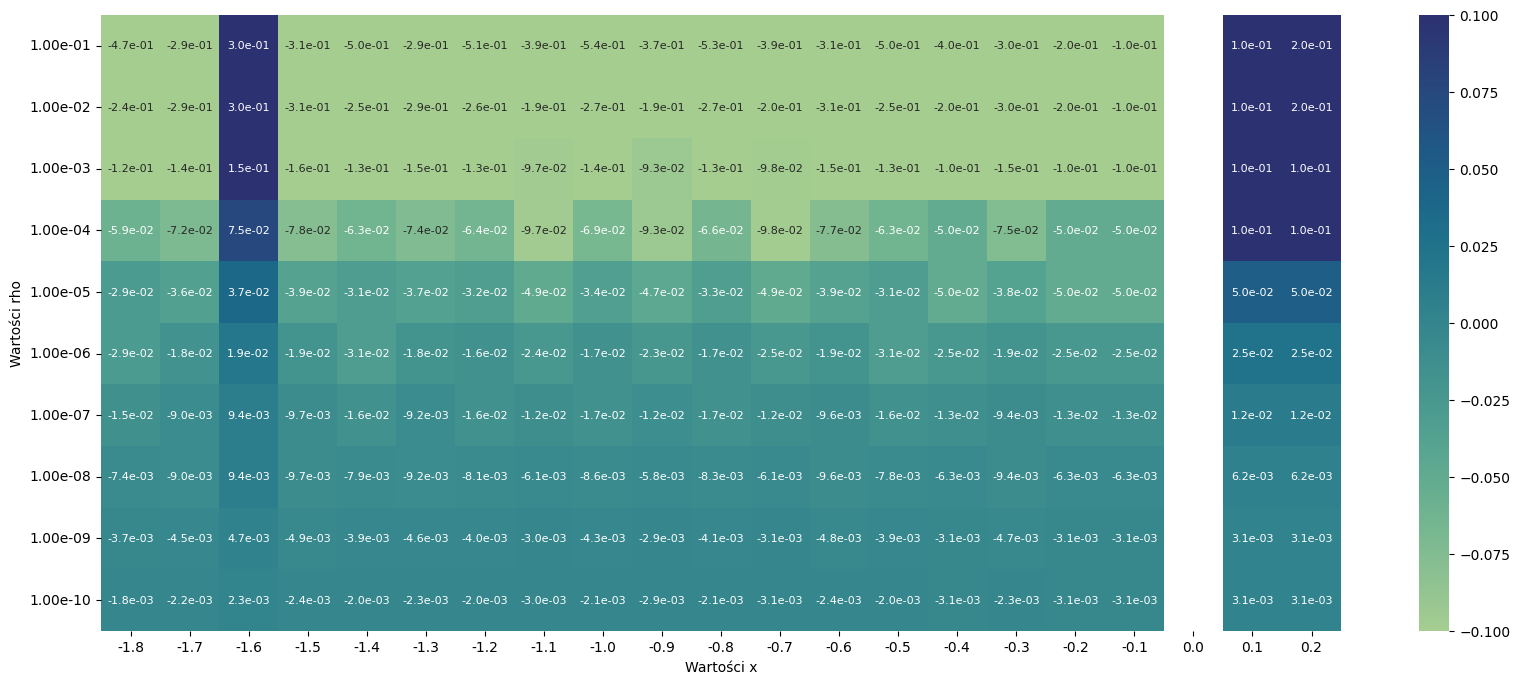

In [279]:
test_newton.plot_heatmap_values(test_newton.eps_values_1, ConditionNewton.ABS)

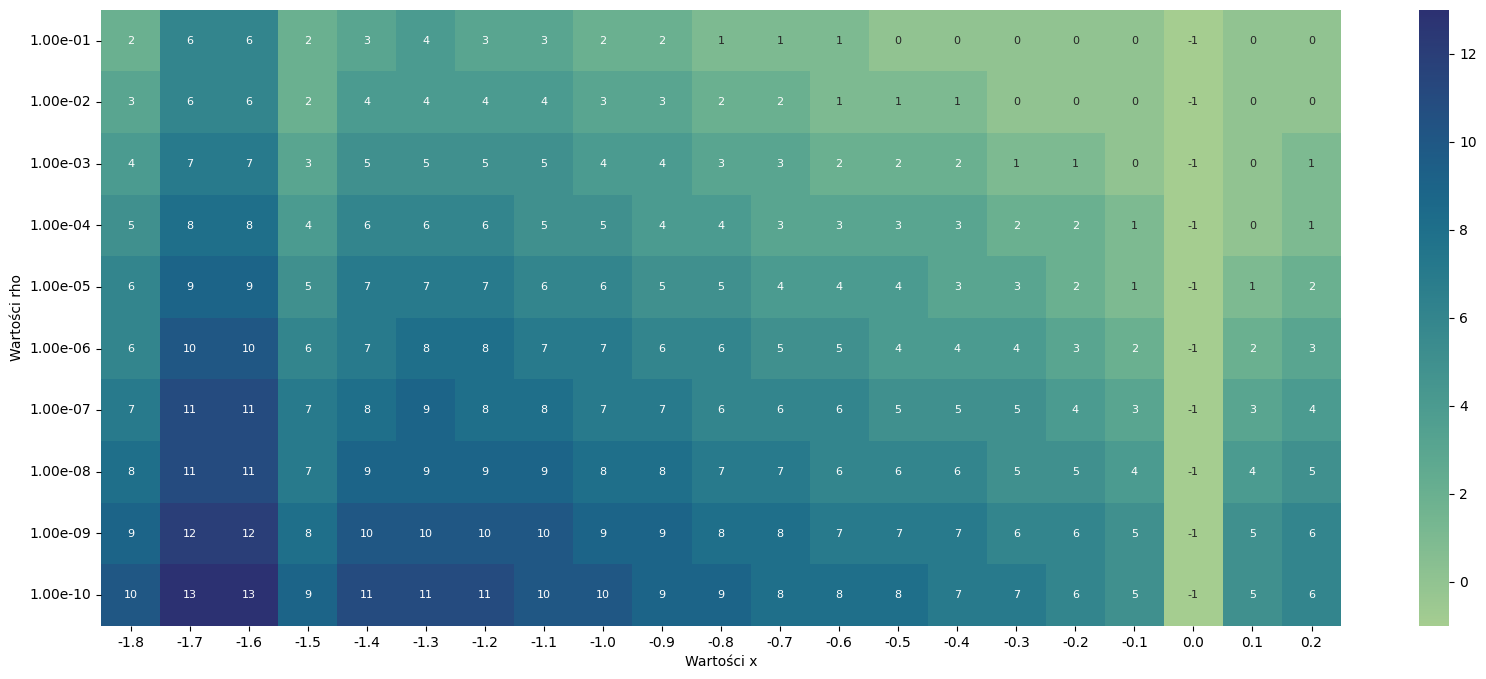

In [280]:
test_newton.plot_heatmap_iterations(test_newton.eps_values_1, ConditionNewton.ABS)

Min value:  -5.7e-06 , Starting x:  -0.9 , Eps:  1e-20 , Contidion:  <function ConditionNewton.<lambda> at 0x7fde5b801a20>


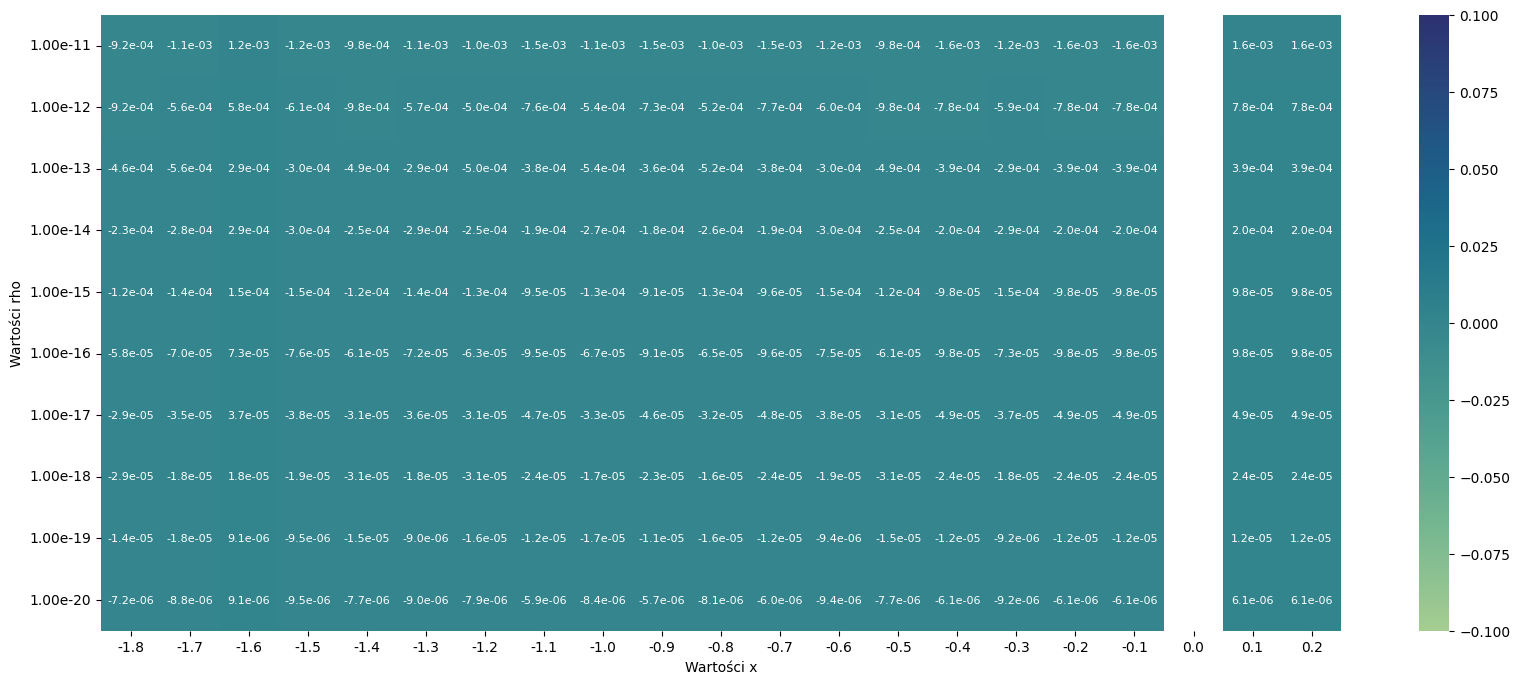

In [281]:
test_newton.plot_heatmap_values(test_newton.eps_values_2, ConditionNewton.ABS)

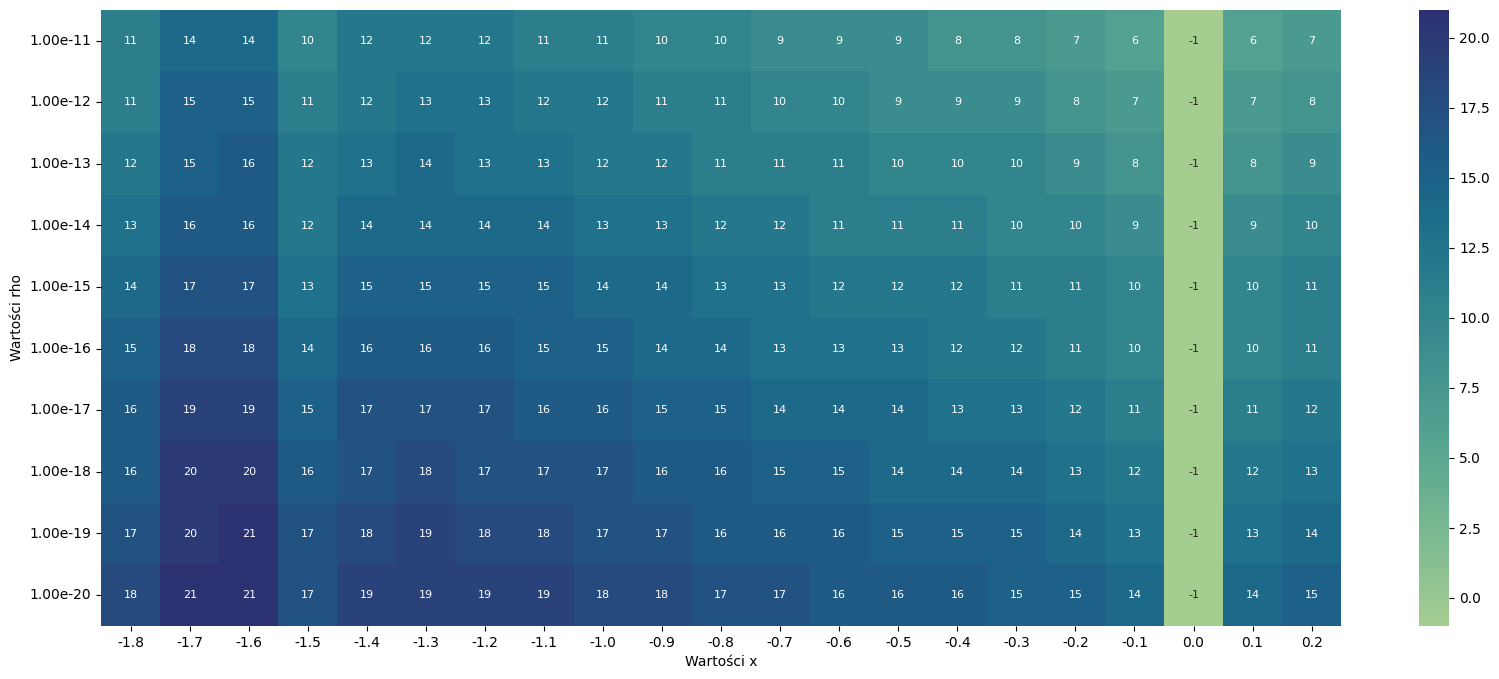

In [282]:
test_newton.plot_heatmap_iterations(test_newton.eps_values_2, ConditionNewton.ABS)

DISTANCE condition

Min value:  -1.1e-10 , Starting x:  -1.8 , Eps:  1e-10 , Contidion:  <function ConditionNewton.<lambda> at 0x7fde5b8003a0>


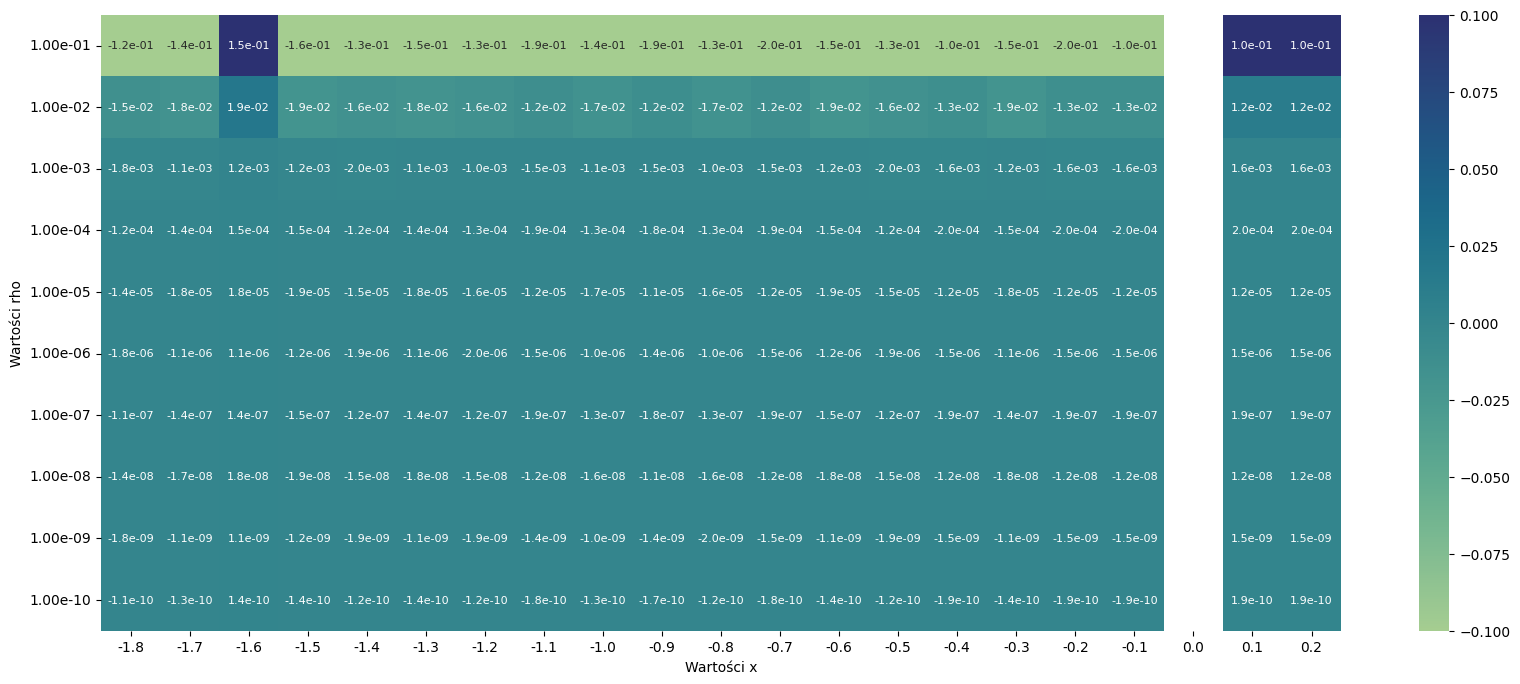

In [283]:
test_newton.plot_heatmap_values(test_newton.eps_values_1, ConditionNewton.DISTANCE)

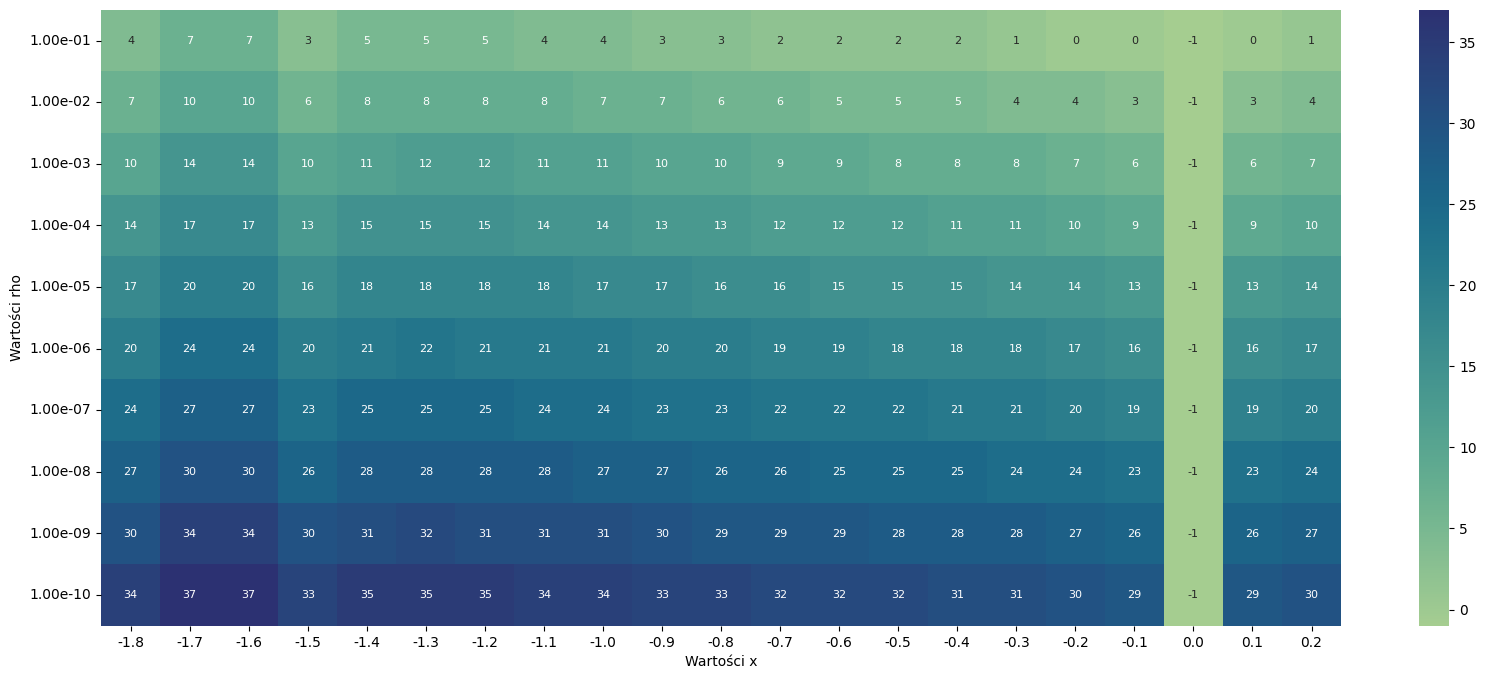

In [284]:
test_newton.plot_heatmap_iterations(test_newton.eps_values_1, ConditionNewton.DISTANCE)

Min value:  -1.0e-20 , Starting x:  -0.9 , Eps:  1e-20 , Contidion:  <function ConditionNewton.<lambda> at 0x7fde5b8003a0>


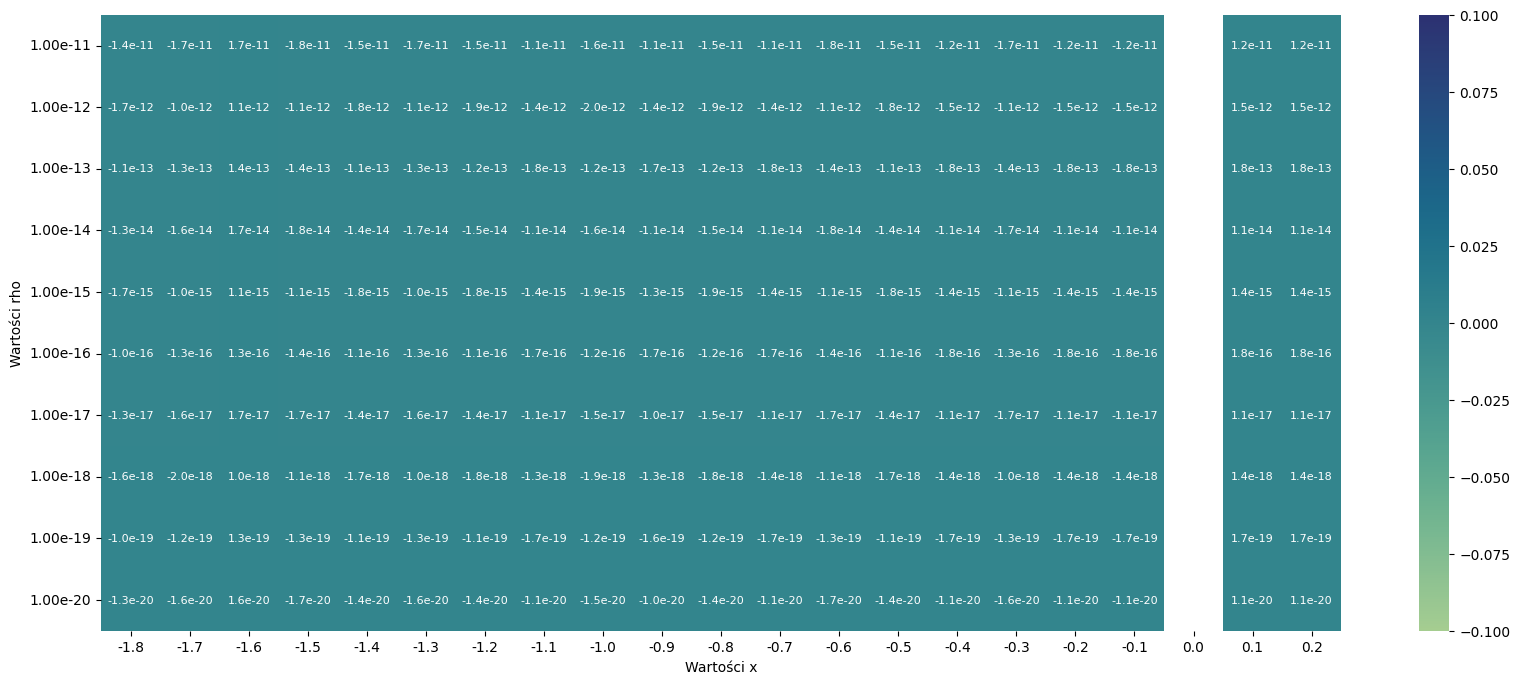

In [285]:
test_newton.plot_heatmap_values(test_newton.eps_values_2, ConditionNewton.DISTANCE)

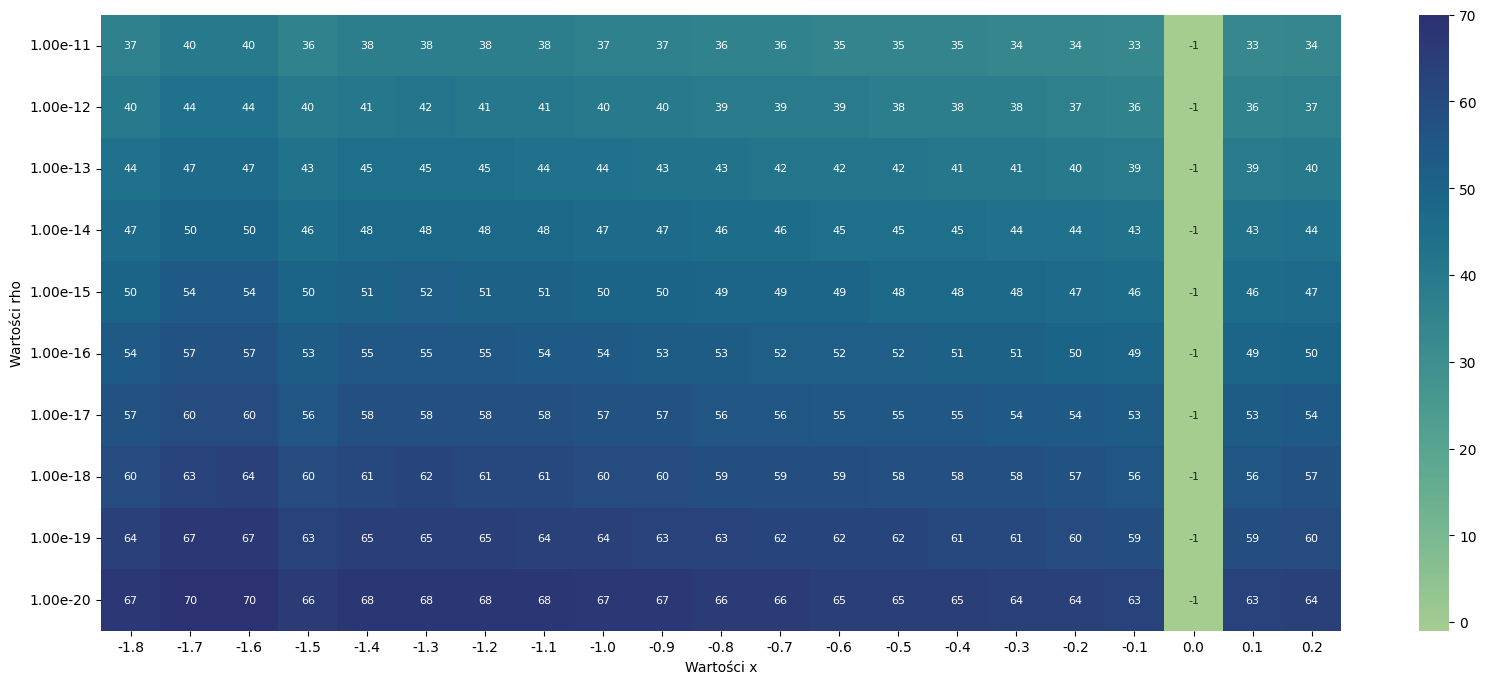

In [286]:
test_newton.plot_heatmap_iterations(test_newton.eps_values_2, ConditionNewton.DISTANCE)